<a href="https://colab.research.google.com/github/nuha18/TSIG-DSAI/blob/main/StudentPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pd.read_csv('/StudentsPerformance.csv')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df = pd.read_csv('/StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.drop(columns=['race/ethnicity','lunch'])

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
...,...,...,...,...,...,...
995,female,master's degree,completed,88,99,95
996,male,high school,none,62,55,55
997,female,high school,completed,59,71,65
998,female,some college,completed,68,78,77


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.notna().value_counts()

,,,,,,,,count
gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,
True,True,True,True,True,True,True,True,1000


In [10]:
df.drop(columns=['race/ethnicity','lunch'],inplace=True)

In [11]:
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [55]:
df = df.rename(columns={'parental level of education':'Parental Education', 'test preparation course':'Test Preparation', 'math score':'Math Score', 'reading score':'Reading Score', 'writing score':'Writing Score', 'gender':'Gender'})
df.head()

,Gender,Parental Education,Test Preparation,Math Score,Reading Score,Writing Score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


# **SCATTER PLOT**

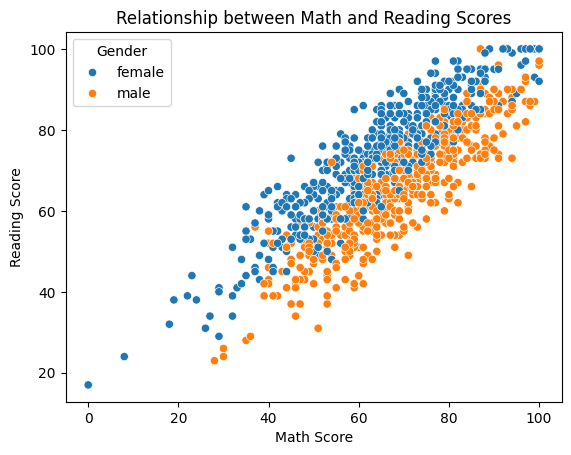

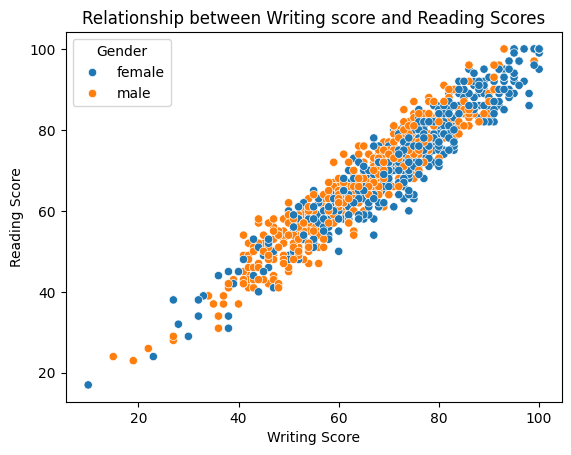

In [58]:
sns.scatterplot(data=df, x='Math Score', y='Reading Score', hue='Gender')
plt.title('Relationship between Math and Reading Scores')
plt.show()

sns.scatterplot(data=df, x='Writing Score', y='Reading Score', hue='Gender')
plt.title('Relationship between Writing score and Reading Scores')
plt.show()

# **HISTOGRAMS**

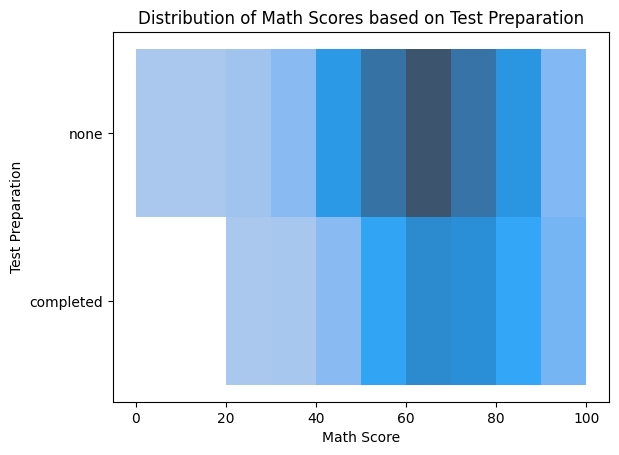

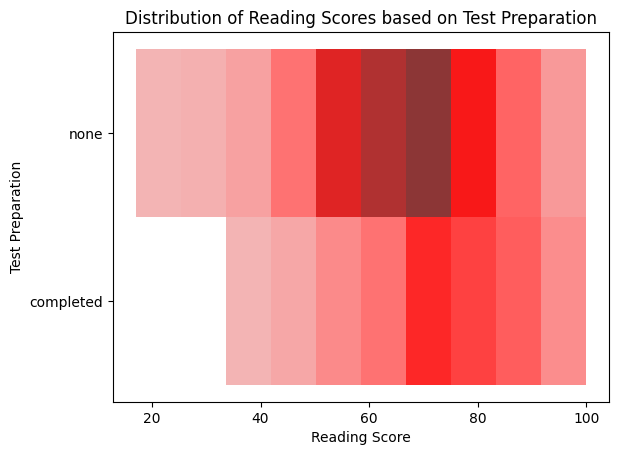

In [60]:
x = np.linspace(10,100,10)
sns.histplot(data=df, x='Math Score', y='Test Preparation', bins=10, kde=True)
plt.title('Distribution of Math Scores based on Test Preparation')
plt.show()
sns.histplot(data=df, x='Reading Score', y='Test Preparation', bins=10, kde=True, color='red')
plt.title('Distribution of Reading Scores based on Test Preparation')
plt.show()

# **HEAT** **MAPS**

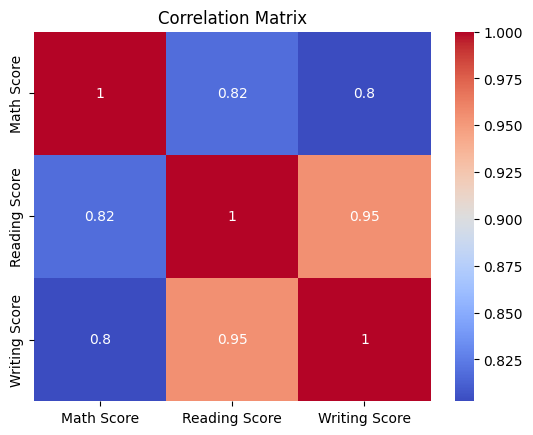

In [67]:
sns.heatmap(data=df[['Math Score', 'Reading Score', 'Writing Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **BOX** **PLOT**

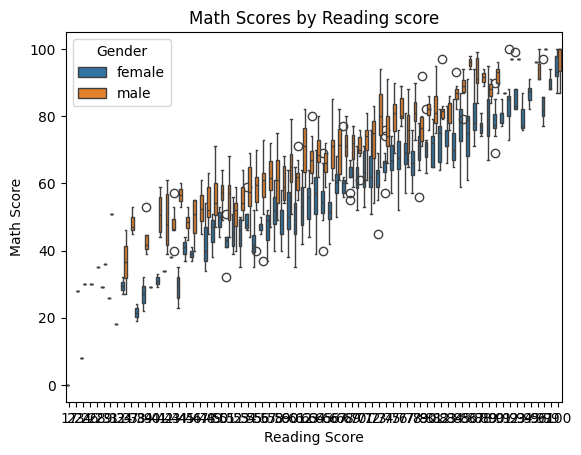

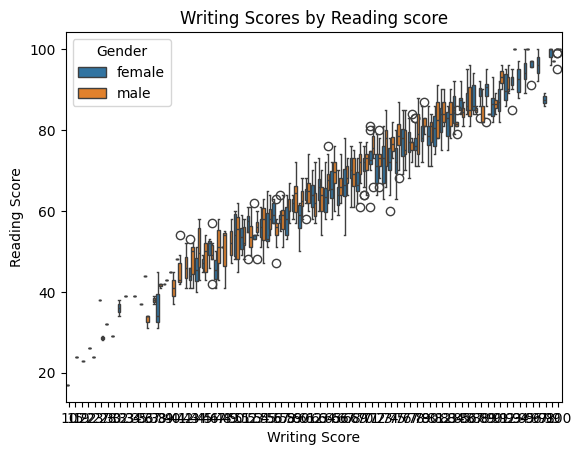

In [64]:
x = np.linspace(10,100,25)
sns.boxplot(data=df, x='Reading Score', y='Math Score', hue='Gender')
plt.title('Math Scores by Reading score')
plt.show()
sns.boxplot(data=df, x='Writing Score', y='Reading Score', hue='Gender')
plt.title('Writing Scores by Reading score')
plt.show()

# **BAR PLOT**

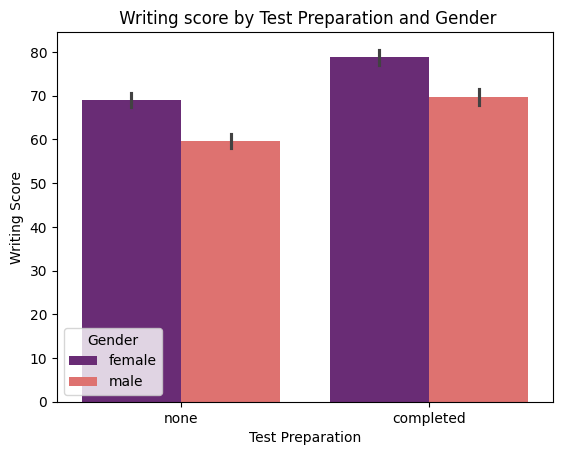

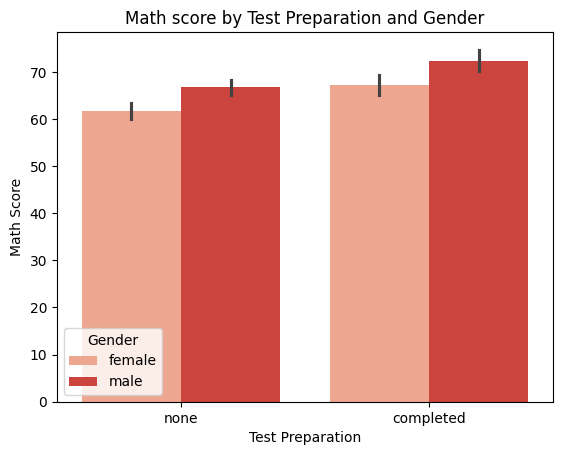

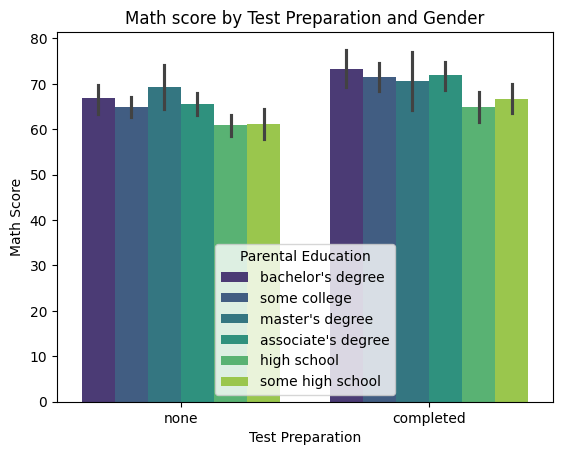

In [71]:
sns.barplot(data=df, x='Test Preparation', y='Writing Score', palette='magma', hue='Gender', legend=True)
plt.title(' Writing score by Test Preparation and Gender')
plt.show()

sns.barplot(data=df, x='Test Preparation', y='Math Score', palette='Reds', hue='Gender', legend=True)
plt.title('Math score by Test Preparation and Gender')
plt.show()

sns.barplot(data=df, x='Test Preparation', y='Math Score', palette='viridis', hue='Parental Education', legend=True)
plt.title('Math score by Test Preparation and Parental Education')
plt.show()